<a href="https://colab.research.google.com/github/somineda/Binary-Classification/blob/main/%E1%84%8B%E1%85%B5%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%89%E1%85%AD%E1%84%91%E1%85%B5%E1%86%BC%E1%84%86%E1%85%AE%E1%86%AF_(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy
!pip install mecab-python
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 5.5 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=1a2f0b138718caf6727f6ee53e51ae07f418651c4979d6cb2f2a68e249bb8ec7
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
--2024-03-27 03:31:52--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2024-03-27 03:31:52--

In [ ]:
#형태소 분석기 설치
!pip install konlpy
!sudo apt-get install g++ openjdk-8-jdk
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
g++ set to manually installed.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm
  libnss-mdns fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common l

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글 나눔 코드 설치


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,158 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122686 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
#패키지 설치
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf

# 데이터 로드
data = pd.read_csv("/content/girl (1).csv", encoding='cp949')

# 컬럼 인덱스 확인
print(data.columns)

# 특성과 목표 변수 설정
X = data['상품평']
y = data['상품평']

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NumPy 배열로 변환
X_train_np = X_train.values.astype('U')
X_test_np = X_test.values.astype('U')

# 텍스트를 벡터화하기
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_np)
X_test_vectorized = vectorizer.transform(X_test_np)

# 텐서플로 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])






Index(['INDEX', '도메인', '카테고리', '상품명', '상품평', '데이터구분', '레이블'], dtype='object')


In [ ]:
import pandas as pd
from konlpy.tag import Okt
import re

# 데이터 불러오기
data = pd.read_csv("/content/girl (1).csv", encoding='cp949')

# 한국어 형태소 분석기 초기화
okt = Okt()

# 데이터 정제 함수 정의
def preprocess_text(text):
    # 한글과 공백을 제외한 모든 문자 제거
    text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", text)
    # 형태소 분석 및 토큰화
    tokens = okt.morphs(text, stem=True)
    # 불용어 제거 (필요시 추가)
    stopwords = ['을', '를', '이', '가', '은', '는']
    tokens = [word for word in tokens if not word in stopwords]
    return " ".join(tokens)

# '상품평' 레이블에 대해 데이터 정제 적용
data['상품평'] = data['상품평'].apply(preprocess_text)

# 정제된 데이터 출력
print(data['상품평'])


0                        여름 에 편하다 막 입다 좋다 \n 특히 쪼끼 젤 이쁘다
1                                         가격 착하다 디자인 예쁘다
2                            싸다 디자인 예쁘다 정말 가성 비 가시다 비 이다
3               편하다 디자인 예쁘다 가격 도 좋다 시원하다 빨리 마르고 것 만 입다 요
4                               너무 착하다 가격 에 감사하다 윈하 색 없다
                             ...                        
666    요즘 온라인 쇼핑몰 에서 말 하다 차다 편하다 바지 정도 의 스판 아니다 스판 없다...
667                  바지 디자인 맘 에 안드 내 요 잠바 도 털 넘다 많이 묻다 좀
668              바지 따뜻하다 않다 핏 이쁘다 않다 옷 도 불편하다 근데 바지 짧다 ㅠ
669          바지 도 따뜻하다 않다 핏 도 안 예쁘다 \n 사이즈 도 살짝 크다 좀 아쉽다
670    안감 부드럽다 않다 따뜻하다 않다 신축 성 없다 밑위 많이 짧다 불편하다 핏 도 그...
Name: 상품평, Length: 671, dtype: object


In [ ]:
import pandas as pd

# Train 데이터 불러오기 (인코딩 지정)
train_data = pd.read_csv("/content/girl (1).csv", encoding='cp949')

# 데이터 확인
print(train_data.head())


   INDEX 도메인  카테고리                상품명  \
0      6  패션  여성의류  OO 플** 베스트 풀코디 3종   
1      7  패션  여성의류  OO 플** 베스트 풀코디 3종   
2      9  패션  여성의류  OO 플** 베스트 풀코디 3종   
3     15  패션  여성의류  OO 플** 베스트 풀코디 3종   
4     17  패션  여성의류  OO 플** 베스트 풀코디 3종   

                                                 상품평 데이터구분  레이블  
0                    여름에 편하게  막입기 조아요\n특히 쪼끼가  젤 이뻐요   쇼핑몰  1.0  
1                                  가격이 착하고 디자인이 예쁩니다   쇼핑몰  1.0  
2                    싸고  디자인이 예뻐요. . 정말  가성비 가심비 입니다   쇼핑몰  1.0  
3  편하고  디자인이 예뻐요  가격도  좋아요   시원해요  빨리 마르고  이것만  입게되요   쇼핑몰  1.0  
4                          너무 착한가격에 감사합니다 윈하는 색은 없지만   쇼핑몰  0.0  


In [ ]:
train_data.sample(n=5)

,INDEX,도메인,카테고리,상품명,상품평,데이터구분,레이블
635,132253,패션,여성의류,OO 여성 데님2종 + 브리프5종 세트,평소27입는데요건26주문했더니잘맞고소재얇고신축성짱스타일너무편하고좋아요,쇼핑몰,1.0
491,748,패션,여성의류,OO 캐시미어 블** 숄가디건,봄이 되면 간절기에 편하게 입고 일할수있는 편리성과 각각 옷을 다양하게 코디하기에 ...,쇼핑몰,1.0
480,725,패션,여성의류,OO 캐시미어 블** 숄가디건,ㅇㅇ쇼핑에서 첨으로 구매했어요!니트티는 좀 얇아서 봄 가을에 입으려구요\n판쵸는 아...,쇼핑몰,1.0
523,100329,패션,여성의류,OO 여성용 카** 티셔츠 7종 (여),색상은 안예쁘고 디자인은 촌스럽네요\n여름에 입기엔 너무 두꺼워요\n사이즈는 정사이...,쇼핑몰,0.0
448,628,패션,여성의류,OO 여성 니트자켓+니트티셔츠 총 4종,비싼돈주고 이동수 골프웨어민 구입했었는데\n싸고 질좋은것을 질선택했습니다.\n맘에 ...,쇼핑몰,1.0


In [ ]:
#데이터 분할
train_data, test_data = train_test_split(train_data, test_size=0.25, random_state=42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))



훈련용 리뷰의 개수 : 503
테스트용 리뷰의 개수 : 168


In [ ]:
# 결측값을 다른 값으로 대체
train_data['상품평'].fillna('', inplace=True)

In [ ]:
train_data['상품평'] = train_data['상품평'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data['상품평'].replace('', np.nan, inplace=True)
train_data.dropna(subset=['상품평'], inplace=True)

<ipython-input-54-c09a2ef03093>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['상품평'] = train_data['상품평'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

# 데이터 로드
data = pd.read_csv("/content/girl (1).csv", encoding='cp949')

# 형태소 분석기 초기화
okt = Okt()

# '상품평' 열에서 명사만 추출
nouns_list = data['상품평'].apply(lambda x: okt.nouns(x))

# 명사 리스트를 단어로 펼치기
all_nouns = [noun for sublist in nouns_list for noun in sublist]

# 빈도수 계산
noun_counter = Counter(all_nouns)

# 빈도수가 높은 명사 상위 100개 출력
top_nouns = noun_counter.most_common(100)
print("상위 100개 명사 빈도수:", top_nouns)







상위 100개 명사 빈도수: [('사이즈', 169), ('가격', 168), ('디자인', 160), ('옷', 108), ('색상', 107), ('맘', 90), ('좀', 80), ('구매', 79), ('핏', 76), ('바지', 74), ('길이', 63), ('주문', 60), ('대비', 58), ('소재', 47), ('가성', 46), ('비', 44), ('품질', 44), ('재질', 43), ('그냥', 42), ('목', 42), ('상품', 41), ('반품', 39), ('생각', 38), ('때', 36), ('조금', 36), ('감', 35), ('착용', 35), ('것', 34), ('크게', 34), ('약간', 33), ('더', 32), ('이즈', 32), ('별로', 31), ('니트', 31), ('구입', 30), ('신축', 30), ('요', 29), ('여름', 28), ('제품', 26), ('티', 26), ('색', 24), ('해', 24), ('촉감', 24), ('원단', 24), ('보풀', 24), ('부분', 24), ('여유', 23), ('안', 23), ('티셔츠', 22), ('입', 22), ('듯', 22), ('모두', 22), ('아주', 22), ('제', 22), ('완전', 22), ('정말', 21), ('추천', 21), ('느낌', 21), ('정사', 21), ('세탁', 20), ('살짝', 20), ('마음', 20), ('저', 20), ('정도', 20), ('배송', 19), ('허리', 19), ('레드', 18), ('보이', 17), ('최고', 17), ('두께', 17), ('개', 17), ('하나', 16), ('득템', 16), ('치수', 16), ('만족', 15), ('수', 15), ('기대', 15), ('봄', 15), ('블랙', 14), ('겨울', 14), ('편이', 14), ('엄마', 14), ('색깔', 13), (

In [ ]:


# 결과를 CSV 파일에 저장
import csv

# 결과를 CSV 파일에 저장
with open('top_nouns_frequency.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['단어', '빈도수'])
    writer.writerows(top_nouns)

In [ ]:
#단어 리스트 보완
positive_words = ['친절', '좋아요', '만족', '편리', '고품질', '다양한', '예뻐', '가성비', '적당해요', '가격대비', '착한', '맘', '아주', '완전', '추천', '최고', '득템', '만족', '가성', '좋아', '비', '적당', '매일', '자주', '잘', '좋', '넉넉', '멋진']  # 긍정 단어 리스트
negative_words = ['근데', '안맞아', '별로', '비린', '아파', '싸구려', '싼티', '보풀', '지저분', '실망', '좋지않아', '커서', '빠집니다', '팔지', '작고', '별루', '구김이', '크고', '안맞아', '비싸', '구려', '짧으네요', '까칠하고', '불편하네요', '반품', '조금', '별로', '안', '고민', '그냥', '살짝', '싫어', '별', '구김', '짧', '보풀', '부푸', '마감', '짧', '까끌']    # 부정 단어 리스트

In [ ]:
# 훈련 데이터와 테스트 데이터로 나누기
X=test_data.values
y = test_data.values
X.shape, y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

# X_train을 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train)

# NaN 값 처리 (NaN 값을 빈 문자열로 대체)
X_train_df = X_train_df.fillna('')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# NaN 값 처리 ( NaN 값을 빈 문자열로 대체)
X_train = X_train.fillna('')

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [ ]:
import tensorflow as tf

# 텍스트 데이터를 텐서로 변환
X_train_tensor = tf.convert_to_tensor(X_train_vectorized.toarray(), dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_vectorized.toarray(), dtype=tf.float32)

# 텐서플로 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_tensor.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf

# 텐서플로 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_tensor.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 텍스트 데이터를 텐서로 변환
X_train_tensor = tf.convert_to_tensor(X_train_vectorized.toarray(), dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_vectorized.toarray(), dtype=tf.float32)




In [ ]:
print(type(y_train))
print(y_train)


<class 'numpy.ndarray'>
[[369 '패션' '여성의류' 'OO 레이어드 풀오버 4종 세트'
  '빠른 배송 감사드려요. 촉감이 부드럽고 색상이 넘 이뻐요. 핏은 여유있어 편하고 좋아요' '쇼핑몰' 1.0]
 [126010 '패션' '여성의류' 'OO 라** 썸머 여성 일자핏 데님 3종'
  '정싸이즈     잘맞는데 앉잤다일어나면      허리아래로    바지가 내려가서    자꾸 올리게 되서   약간불편합니다 참고하세요'
  '쇼핑몰' 0.0]
 [725 '패션' '여성의류' 'OO 캐시미어 블** 숄가디건'
  'ㅇㅇ쇼핑에서 첨으로 구매했어요!니트티는 좀 얇아서 봄 가을에 입으려구요\n판쵸는 아이보리보다 블랙니트티에 입으니 디자인이 더 고급스럽고 멋스럽네요!\n저렴한가격으로 맘에 드는옷샀어요'
  '쇼핑몰' 1.0]
 [134000 '패션' '여성의류' 'OO 벨** 여성 데님 2종+ 폴리스집업'
  '바지디자인맘에안드내요ㆍ잠바도 털이 넘많이 묻아나서 좀 ?' '쇼핑몰' 0.0]
 [77 '패션' '여성의류' 'OO 샤** 썸머 쿨니트 4종'
  '오 좋아요\n이가격에 득템 했네요\n살이쪄서 고민이었는데 어지간히 커버도 되고 가볍고 시원할듯 해요\n잘 입을께요\n바로 세탁하느라 시착만 해서 사진은 스크린샷 으로 대체해요 사진하고 똑 같으니 걱정마세요\n추천 합니다'
  '쇼핑몰' 1.0]
 [490 '패션' '여성의류' 'OO 기모 풀오버 3종 SET'
  '두껍지도 얇지도 \n적당한 기모  고급지진 않지만\n편하게 입을수 있을것 같아요.' '쇼핑몰' 0.0]
 [243 '패션' '여성의류' 'OO 여성 니트 3종'
  '아주 만족스럽네요. 두께는 얇아요 소재도 원하던 느낌이구요 기계세탁되서  너무좋습니다. 그리고 코튼이라 안끌거림 없습니다.  굿굿'
  '쇼핑몰' 1.0]
 [192 '패션' '여성의류' 'OO 웜 소프트 부** 니트 3종세트'
  '너무 따뜻하고 색깔도 이쁘고 다 만족합니다 감사합니다 잘입을께요' '쇼핑몰' 1.0]


In [ ]:
y_train_binary = (y_train == '여성의류').astype(int)


In [ ]:
import numpy as np

# '여성의류'를 1로, 그렇지 않은 경우를 0으로 변환
y_train_binary = np.where(y_train == '여성의류', 1, 0)


In [ ]:
# 모델 훈련
model.fit(X_train_vectorized,y_train,epochs=3)

# 성능 평가
loss,accuracy=model.evaluate(X_test_vectorized,y_test)
print(f'손실:{loss}, 정확도:{accuracy}')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
# 모델 예측
y_pred_data = model.predict(X_test_tensor)
y_pred = (y_pred_data > 0.5).astype(int)

# 예측 결과 출력
print(y_pred)


5/5 [==============================] - 0s 3ms/step
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [ ]:
# 데이터프레임 생성 또는 불러오기
data = pd.read_csv("/content/girl (1).csv", encoding='cp949')
df = pd.DataFrame(data)

# 긍정 단어와 부정 단어 개수 피처 생성
data['positive_word_count'] = df['상품평'].apply(lambda x: sum(word in positive_words for word in x.split()))
data['negative_word_count'] = df['상품평'].apply(lambda x: sum(word in negative_words for word in x.split()))

# 이진 분류를 위한 레이블 생성 (예: 긍정적인 리뷰는 1, 부정적인 리뷰는 0)
data['sentiment'] = (data['positive_word_count'] > data['negative_word_count']).astype(int)

# 긍정 단어의 개수가 부정 단어의 개수보다 많으면 해당 행의 'sentiment' 열 값을 1로, 그렇지 않으면 0으로 설정하여 이진 분류를 위한 레이블을 생성합니다.


In [ ]:
# 긍정 리뷰와 부정 리뷰에 대한 단어 포함 여부의 평균 계산
avg_contains_positive_words = data[data['sentiment'] == 1]['positive_word_count'].mean()
avg_contains_negative_words = data[data['sentiment'] == 0]['negative_word_count'].mean()

# 긍정, 부정 단어가 포함된 데이터 수 세기
positive_indices = data[data['sentiment'] == 1].index
negative_indices = data[data['sentiment'] == 0].index

# 시각화를 위한 데이터 준비
categories = ['Positive', 'Negative']
counts = [len(positive_indices), len(negative_indices)]

# 결과 출력
print(avg_contains_positive_words, avg_contains_negative_words, counts)


1.375 0.2964509394572025 [192, 479]


In [ ]:
# 결과 출력
print(data[data['sentiment'] == 1].head())
print(data[data['sentiment'] == 0].head())

# CSV 파일로 저장
data[data['sentiment'] == 1].to_csv('positive_reviews.csv', index=False)
data[data['sentiment'] == 0].to_csv('negative_reviews.csv', index=False)

# 결과를 result_data에 저장
result_data = pd.concat([data[data['sentiment'] == 1], data[data['sentiment'] == 0]])

# result_data를 CSV 파일로 저장
result_data.to_csv('result_data.csv', index=False)



    INDEX 도메인  카테고리                        상품명  \
2       9  패션  여성의류          OO 플** 베스트 풀코디 3종   
3      15  패션  여성의류          OO 플** 베스트 풀코디 3종   
9      38  패션  여성의류          OO 플** 베스트 풀코디 3종   
10     54  패션  여성의류  OO 여성 소프트 진주 아** 니트 2종 택1   
12     57  패션  여성의류  OO 여성 소프트 진주 아** 니트 2종 택1   

                                                  상품평 데이터구분  레이블  \
2                     싸고  디자인이 예뻐요. . 정말  가성비 가심비 입니다   쇼핑몰  1.0   
3   편하고  디자인이 예뻐요  가격도  좋아요   시원해요  빨리 마르고  이것만  입게되요   쇼핑몰  1.0   
9   바지가 너무 편하고 좋아요 티셔츠는 여름에 잘 입을 듯\n베스트는 디자인은 별로지만...   쇼핑몰  0.0   
10                              디자인이 예뻐요. 사이즈 잘 맞습니다.   쇼핑몰  1.0   
12                            저렴하게 구입해서 겨울에 잘 입을거 같아요   쇼핑몰  1.0   

    positive_word_count  negative_word_count  sentiment  
2                     1                    0          1  
3                     1                    0          1  
9                     3                    0          1  
10                    1                    0          1  


In [ ]:
# result_data에 레이블 추가
result_data['sentiment'] = df['sentiment']

In [ ]:
positive_reviews = data[data['sentiment'] == 1]['상품평']
negative_reviews = data[data['sentiment'] == 0]['상품평']


In [ ]:
# 긍정 리뷰와 부정 리뷰에 대한 단어 포함 여부의 평균 계산
avg_contains_positive_words = data[data['sentiment'] == 1]['positive_word_count'].mean()
avg_contains_negative_words = data[data['sentiment'] == 0]['negative_word_count'].mean()

# 결과 출력
print(avg_contains_positive_words, avg_contains_negative_words)


1.375 0.2964509394572025


In [ ]:
# 긍정, 부정 단어가 포함된 데이터 수 세기
positive_indices = [i for i, label in enumerate(y_test) if label == 1 and y_pred[i] == 1]
negative_indices = [i for i, label in enumerate(y_test) if label == 0 and y_pred[i] == 0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# 시각화를 위한 데이터 준비
categories = ['Positive', 'Negative']
counts = [len(positive_indices), len(negative_indices)]

In [ ]:
positive_reviews.columns = ['Unnamed: 4']  # 여기에 긍정 리뷰의 열 이름을 지정
negative_reviews.columns = ['Unnamed: 4']  # 여기에 부정 리뷰의 열 이름을 지정

<Axes: >

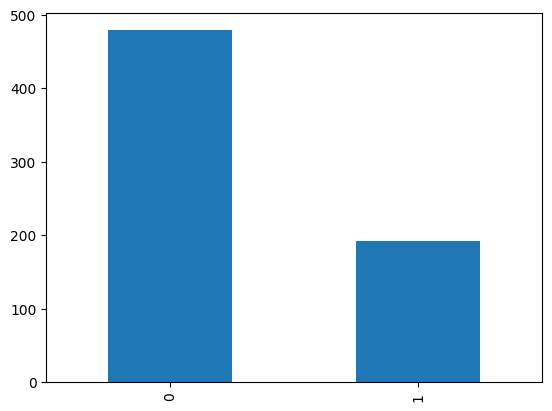

In [ ]:
# 막대 그래프로 시각화
# 긍정 단어의 개수가 부정 단어의 개수보다 많으면 해당 행의 'sentiment' 열 값을 1로, 그렇지 않으면 0으로 설정하여 이진 분류를 위한 레이블을 생성
result_data['sentiment'].value_counts().plot(kind='bar')


In [ ]:
result_label = data['레이블']

print(result_label)

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
666    0.0
667    0.0
668    0.0
669    0.0
670    1.0
Name: 레이블, Length: 671, dtype: float64


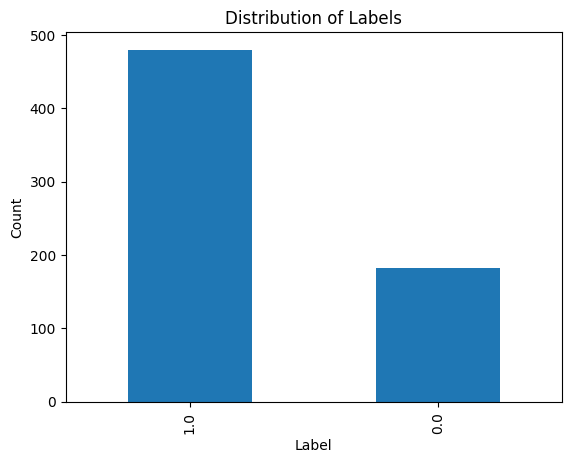

In [ ]:
# 레이블 값의 빈도 계산
label_counts = result_label.value_counts()

# 바 그래프로 시각화
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
data = data.dropna(subset=['레이블', 'sentiment'])


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# NaN 값을 0으로 대체합니다.
result_label_matched.fillna(0, inplace=True)
y_pred_data_matched.fillna(0, inplace=True)

# 정확도 계산
accuracy_data = accuracy_score(result_label_matched, y_pred_data_matched)

print("Data Model Accuracy:", accuracy_data)





Data Model Accuracy: 0.34074074074074073


In [ ]:
import pandas as pd

# CSV 파일 불러오기
data = pd.read_csv("/content/girl (1).csv", encoding='cp949')
data = pd.read_csv("/content/result_data.csv", encoding='utf-8')

# 레이블과 이진 분류 결과를 각각 가져옵니다.
true_labels = data['레이블']
result_data = data['sentiment']

# 정확도 계산
accuracy = (true_labels == result_data).mean()

print("Accuracy:", accuracy)


Accuracy: 0.496274217585693


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

# 데이터 로드
data = pd.read_csv("/content/girl (1).csv", encoding='utf-8')


# 특성과 목표 변수 설정
X = data['Unnamed: 4']
y = data['Unnamed: 6']

# 이진 분류 레이블 설정
y_binary = np.where(y == 'positive', 1, 0)  # 'positive'를 1로, 'negative'를 0으로 매핑

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 텍스트를 벡터화하기
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 희소 행렬을 희소 텐서로 변환
X_train_sparse = tf.sparse.SparseTensor(
    indices=np.column_stack(X_train_vectorized.nonzero()),
    values=X_train_vectorized.data,
    dense_shape=X_train_vectorized.shape
)

# 희소 텐서의 인덱스를 정렬
X_train_sparse_ordered = tf.sparse.reorder(X_train_sparse)

# 텐서플로 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train_sparse_ordered, y_train, epochs=3)

# 모델 예측
y_pred = model.predict(X_test_vectorized)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


Epoch 1/3
28/28 [==============================] - 1s 4ms/step - loss: 0.5446 - accuracy: 0.9761
Epoch 2/3
28/28 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 1.0000
Epoch 3/3
7/7 [==============================] - 0s 2ms/step
Accuracy: 1.0
